In [1]:
import pandas as pd

raw_data = pd.read_csv('../data/creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
# 불균형 데이터
fraud_rate = round(raw_data['Class'].value_counts()[1]/(raw_data['Class'].value_counts()[0]+raw_data['Class'].value_counts()[1])*100, 2)
print('Frauds rate: {}%'.format(fraud_rate))

Frauds rate: 0.17%


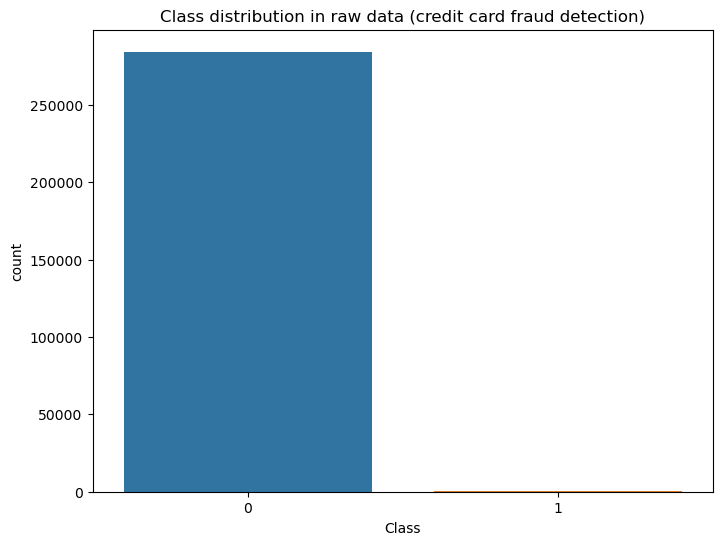

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=raw_data)
plt.title('Class distribution in raw data (credit card fraud detection)')
plt.show()

In [7]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [9]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [10]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp

array([199020,    344], dtype=int64)

In [12]:
tmp[1]/tmp.sum() * 100

0.17254870488152324

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    return accuracy, precision, recall, f1, roc_auc

In [18]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    accuracy, precision, recall, f1, roc_auc = get_clf_eval(y_test, pred)
    counfusion = confusion_matrix(y_test, pred)

    print('='*30)
    print('Confusion Matrix: \n{}'.format(counfusion))
    print('='*30)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, \nRecall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', random_state=13)
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

Confusion Matrix: 
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889, 
Recall: 0.5946, F1: 0.7126, AUC: 0.7972


In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

Confusion Matrix: 
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833, 
Recall: 0.7162, F1: 0.7910, AUC: 0.8580


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs=-1)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

Confusion Matrix: 
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565, 
Recall: 0.7432, F1: 0.8365, AUC: 0.8716


In [26]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)

lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [34]:
def get_result(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    return get_clf_eval(y_test, pred)

In [35]:
def get_result_pd(models, model_names, X_train, X_test, y_train, y_test):
    tmp = []
    for model in models:
        tmp.append(get_result(model, X_train, X_test, y_train, y_test))

    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    return pd.DataFrame(tmp, index=model_names, columns=col_names)

In [36]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, X_test, y_train, y_test)
end_time = time.time()

print(f'Runtime of this job was {end_time - start_time} seconds')
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.999169,0.888889,0.594595,0.712551,0.797233
Decision Tree,0.999345,0.883333,0.716216,0.791045,0.858026
Random Forest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100
